In [12]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import time
import datetime
from datetime import time
import math
import pathlib
import IPython.display as IPydisplay
%matplotlib inline

In [16]:
ticker = input('Input ticker')
#inputs the name of the ticker folder
file = input('Input the name of the file')
#inputs the name of the file
start = input('Input start time frame (format : YYYY-MM-DD H:M:S)')
#inputs the start date to filter
end = input('End time frame (format : YYYY-MM-DD H:M:S)')
#inputs the end date of filter
bins_cat = input("What category do you want to filter (below_25, mean, 75_percentile, Max)")
#inputs the marker want to use on chart

Input tickerMSFT
Input the name of the fileMSFT_minute_15_False.csv
Input start time frame (format : YYYY-MM-DD H:M:S)2022-01-01 00:00:00
End time frame (format : YYYY-MM-DD H:M:S)2022-04-01 00:00:00
What category do you want to filter (below_25, mean, 75_percentile, Max)mean


In [17]:
#function to make bins for different  

def bin_function(df):
    #find mean of volume
    
    mean = df['Volume'].mean()
    
    #lower portion of volume

    percent_25 = mean / 2
    
    #max volume

    max_volume = df['Volume'].max()
    
    #find higher portion of volume
    
    percent_75 = mean + (max_volume - mean) / 2
    
    #create bins and labels

    bins = [0, percent_25, mean, percent_75, max_volume]

    group_labels = ["below_25", "mean", "75_percentile", "Max"]

    df["Range"] = pd.cut(df["Volume"], bins, labels=group_labels)

    #df["%Gain"] = (df["Close"] - df[\"Open"]) / df["Open"] * 100
    
    # create range of day for trading

    df["Range of the day"] = df["High"] - df["Low"]

    df = df.dropna()
    
    return df

In [18]:
def plot_data(df, ticker, start, end):
    #plots the data with the date filter applied
    start = datetime.datetime.strptime(f'{start}', '%Y-%m-%d %H:%M:%S')
    end = datetime.datetime.strptime(f'{end}', '%Y-%m-%d %H:%M:%S')
    sdf = (df.index > start) & (df.index < end)
    #makes subplots of emas and marker
    var_edit = [mpf.make_addplot(df.loc[sdf, ('100dayEWM', '50dayEWM', '10dayEWM')]),
                mpf.make_addplot(df.loc[sdf, ticker], type='scatter', marker = '^', color = 'black')
               ]
    #display chart
    display(mpf.plot(df.loc[sdf], type = 'candle', style = 'yahoo', addplot = var_edit, volume=True))

In [19]:
def cat_sort(range_info, df):
    test = []
    #sorts the range if it is equal to the bin
    for x, row in df.iterrows():
        if row['Range'] == range_info:
            #appends the low if true
            test.append(row['Low'])
        else:
            #append to nan 
            test.append(np.nan)
    df[f"{range_info}"] = test
    return df

In [20]:
def analyze_chart(ticker, file, start, end):
    
    #extract the file
    df = pd.read_csv(f"Extracting_Data/{ticker}/{file}")
    #set datetime as index
    df = df.set_index('Datetime')
    df.index = pd.to_datetime(df.index)
    #creates previous low shifting low column
    df['Previous_Low'] = df['Low'].shift(1)
    
    #call bin function
    df = bin_function(df)
        
    #sort marker     
    df = cat_sort(bins_cat, df)

    #create emas 
    df['50dayEWM'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['100dayEWM'] = df['Close'].ewm(span=100, adjust=False).mean()
    df['10dayEWM'] = df['Close'].ewm(span=10, adjust=False).mean()
    #plots data
    plot_data(df, bins_cat, start, end)
    
    return df

0 369149.73076923075 738299.4615384615 1686054.2307692308 2633809


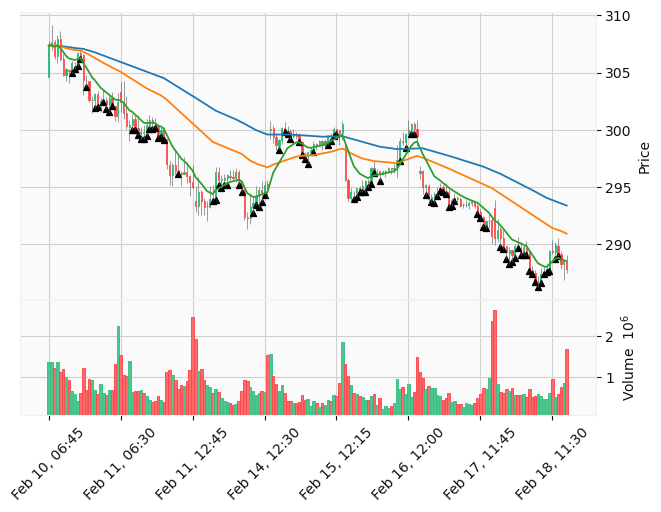

None

In [21]:
#calls data
data_df = analyze_chart(ticker, file, start, end)